In [5]:
#KMeans for color quantization
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from scipy.spatial import distance

In [6]:
def codebook (source, n_points):
    codebook = shuffle(source, random_state=0)[:n_points]
    return codebook

In [7]:
def assign_samples (codebook, samples):
    cl =[]
    for i in range(samples.shape[0]):
        s_i = np.transpose(samples[i].reshape(samples[i].shape[0],-1)) #to convert 1d array in 2d array
        dist_i = distance.cdist(s_i, codebook, 'euclidean')
        cl_i = np.argmin(dist_i)
        cl.append(cl_i)
    return cl

In [8]:
def calculate_centroids(samples, codebook, cl, n_points):
    centroid = codebook.copy() 
    somme  = np.zeros((n_points,3))
    divide = np.zeros(n_points) 
    #TO FILL HERE!
    for i in range(len(cl)):
        somme[cl[i]] += samples[i]
        divide[cl[i]] += 1 
        
    for i in range(n_points):
        centroid[i] = somme[i]  / divide[i]
        
    return centroid

In [9]:
def convergence(samples, codebook_old, codebook_current, thr, cl):
    # FILL HERE!
    # Compute here delta_inertia as the difference between the current inertia (compute on the current codebook) 
    # and the inertia at the previous step (computed on the old codebook)
    crrt_inertia = inertia(samples,codebook_current, cl)
    old_inertia  =inertia(samples, codebook_old, cl)
    delta_inertia = crrt_inertia - old_inertia
        
    if (delta_inertia > 0 and delta_inertia < thr):
        return True
    else:
        return False
    

In [19]:
def inertia (samples, codebook, cl):
    dist =[]
    for i in range(codebook.shape[0]):
        s_i = np.array([samples[j] for j in np.where(np.array(cl)==i)])
    
        if s_i.size==0:
            continue
        else:
            s_i=np.hstack((s_i))
            s_i = s_i.reshape(s_i.shape[0],-1) #to convert 1d array in 2d array
            c_i = np.transpose(codebook[i].reshape(codebook[i].shape[0],-1))
          
            dist_i_sqr = (distance.cdist(s_i, c_i, 'euclidean'))**2
            dist_i_sqr_sum = np.sum(dist_i_sqr)
            dist.append(dist_i_sqr_sum)
    value_inertia = np.sum(dist)
    return value_inertia

In [20]:
def KMeans (codebook, samples, thr, max_it):
    count = 1
    n_points = len(codebook)
    cls = assign_samples(codebook, samples)
    centroids = calculate_centroids(samples, codebook, cls, n_points) 
    
    while (convergence(samples, codebook, centroids, thr, cls)== False and count <= max_it): 
        #TO FILL HERE!
        cls = assign_samples(centroids, samples)
        codebook = centroids
        centroids = calculate_centroids(samples, centroids, cls, n_points)
        count += 1 
        
    return cls

In [21]:
def recreate_image(codb, lab, w, h, d):
    img = np.zeros((w,h, d))   
    label_idx = 0
    for i in range(w):
        for j in range(h):
            img[i][j]=codb[lab[label_idx]]
            label_idx = label_idx +1
    return img

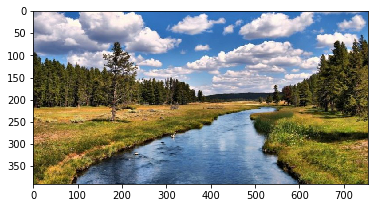

In [22]:
#Reading image
image = plt.imread('landscape.jpg')
image_ = image.astype(float) / 255
plt.imshow(image)

In [23]:
w, h, d = original_shape = tuple(image.shape)

print(w,h,d)
assert d == 3
image_array = np.reshape(image, (w * h, d))

390 755 3


In [24]:
n_colors = 64

threshold = 0.01
max_iterations = 10

/home/jules/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


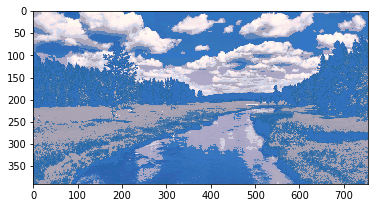

In [25]:
#using 64 points from the fist 500 top points 
codebook_random_1 = codebook(image_array[:500], n_colors)

l = KMeans(codebook_random_1, image_array, threshold, max_iterations)

image_1 = recreate_image(codebook_random_1, l, w, h, d)
image_1 = image_1.astype(float) / 255

plt.figure()
plt.imshow(image_1)

In [26]:
#using 64 poitns from the whole image
codebook_random_2 = codebook(image_array, n_colors)

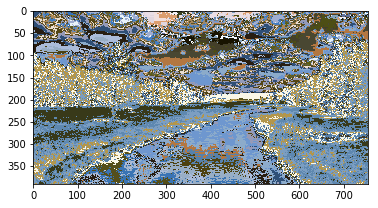

In [27]:
ll = KMeans(codebook_random_2, image_array, threshold, max_iterations)

image_2 = recreate_image(codebook_random_2, l, w, h, d)
image_2 = image_2.astype(float) / 255

plt.figure()
plt.imshow(image_2)